# Assignment 4

For Assignment 4, you are required to complete Exercise 3.13 from the book "An Introduction to Statistical Learning" (ISLP).

**Exercise 3.13** (ISLP).

In this exercise, you will create some simulated data and fit simple linear regression models to it. Ensure you use the default random number generator with the seed set to 1 before starting part (a) to ensure consistent results.

**(a)** Using the `numpy.random.normal()` method of your random number generator, create a vector, `x`, containing 100 observations drawn from an N(0, 1) distribution. This represents a feature, X.

**(b)** Using the `numpy.random.normal()` method, create a vector, $\epsilon$, containing 100 observations drawn from an N(0, 0.25) distribution—a normal distribution with a mean of zero and a variance of 0.25.

**(c)** Using $x$ and $\epsilon$, generate a vector `y` according to the model: $Y = -1 + 0.5X + \epsilon$. What is the length of the vector `y`? What are the values of $β_0$ and $β_1$ in this linear model?

**(d)** Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

**(e)** Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat{β}_0$ and $\hat{β}_1$ compare to $β_0$ and $β_1$?

**(f)** Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` method of the axes to create an appropriate legend.

**(g)** Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

**(h)** Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.
 You can use $\epsilon$ with variance equal to 0.05 .

**(i)** Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.
 You can use $\epsilon$ with variance equal to 0.5 .

**(j)** What are the confidence intervals for $β_0$ and $β_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

**Extra questions.**

**(e1)** Now create a second variable for the problem $x_2$ that is randomly generated without changing your $y$ model. How many coefficients does your linear regression model have if we use both $x$ and $x_2$ ? What are the values you expect for the different coefficients?

**(e2)** Fit the linear regression model and provide the confidence interval for the parameters. Do the values of the different coefficients agree with your answer in step **(e1)**?

**(e3)** Now we will use the bootstrapping method in order to train our model several times. To do that, you have to sample B = 10 bootstrap datasets by sampling n=100 points of the original dataset with replacement. Every time we fit the model on the different bootstrap dataset, we take a different estimation of the parameters $\beta_i$, so you will have B different values for each coefficient. Plot the histogram of each coefficient. Find the $2.5\%$ and $97.5\%$ percentiles for each coefficient. Compare the values with the confidence interval of **e2** step. Increase the number of bootstrap samples B and repeat steps of **e3**. What you observe?  
 Note that this approach is different from the bootstrap method for model selection.

## Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(a) 

In [70]:
np.random.seed(1)
n_examples = 100

In [71]:
x = np.random.normal(loc = 0,
                     scale = 1.0,
                     size = (n_examples,1))

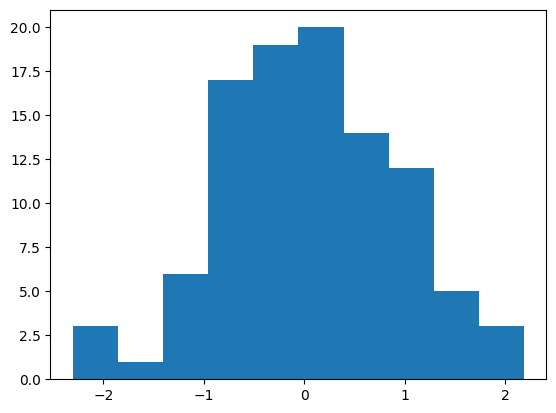

In [73]:
plt.figure()
plt.hist(x[:,0],bins=10)
plt.show()

(b)

In [5]:
eps = np.random.normal(loc = 0,
                     scale = 0.25,
                     size = (n_examples,1))

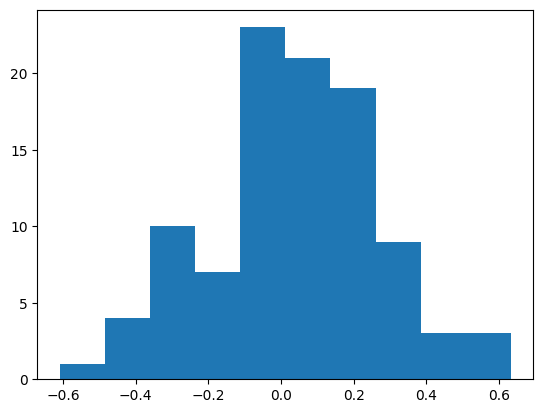

In [74]:
plt.figure()
plt.hist(eps[:,0],bins=10)
plt.show()

(c)

In [7]:
b_0 = -1
b_1 = 0.5
y = b_1 * x + b_0 + eps

In [8]:
y

array([[-0.29960946],
       [-0.99975128],
       [-1.16321297],
       [-1.38808968],
       [-0.84102415],
       [-2.10842374],
       [ 0.05754499],
       [-1.6190286 ],
       [-0.90703508],
       [-1.11653155],
       [-0.61222536],
       [-1.95128051],
       [-0.94966844],
       [-1.40690616],
       [-0.34547878],
       [-1.87801649],
       [-1.09588798],
       [-1.8428723 ],
       [-0.6985387 ],
       [-0.60636726],
       [-1.55646383],
       [-0.62142855],
       [-0.23076566],
       [-0.25697739],
       [-1.01406749],
       [-1.03282292],
       [-0.65453242],
       [-1.38338179],
       [-1.43376105],
       [-0.51898594],
       [-1.39106045],
       [-1.34935692],
       [-1.65110088],
       [-1.28496845],
       [-1.13742135],
       [-1.16221498],
       [-1.42851109],
       [-1.1688775 ],
       [ 0.03036635],
       [-0.6173361 ],
       [-1.14256022],
       [-1.46925095],
       [-1.15635761],
       [ 0.03383021],
       [-0.84222979],
       [-1

(d)

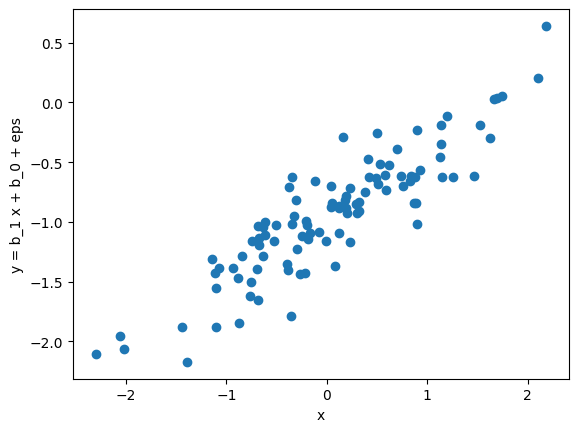

In [9]:
plt.figure()
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y = b_1 x + b_0 + eps")
plt.show()

(e)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
reg = LinearRegression(fit_intercept=True)
reg.fit(x, y)

LinearRegression()

In [53]:
x.shape

(100, 1)

In [54]:
b_1_hat = reg.coef_
b_1_hat

array([[0.52385678]])

In [55]:
b_1

0.5

In [56]:
b_0_hat = reg.intercept_
b_0_hat

array([-0.96324662])

In [57]:
b_0

-1

In [58]:
x_sim = np.linspace(-2,2)

In [59]:
true_line = b_1 * x_sim + b_0
estimated_line =  b_1_hat * x_sim + b_0_hat

In [60]:
x_sim.shape

(50,)

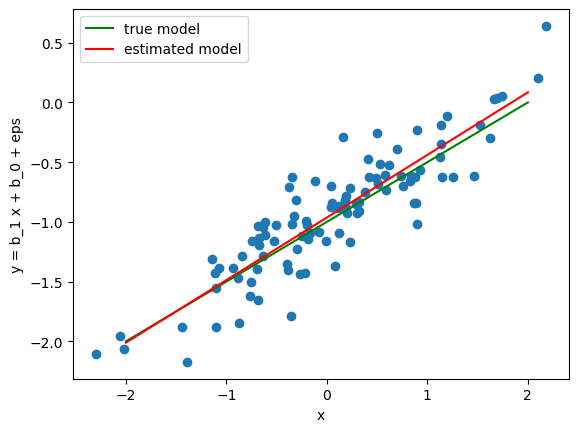

In [61]:
plt.figure()
plt.scatter(x,y)
plt.plot(x_sim, true_line.reshape(-1), color ="green", label = "true model")
plt.plot(x_sim, estimated_line.reshape(-1) ,  color ="red", label = "estimated model")
plt.xlabel("x")
plt.ylabel("y = b_1 x + b_0 + eps")
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

In [64]:
ones = np.ones((100,1))

In [65]:
x_new  = np.concatenate([ones, x],axis=-1)

In [66]:
model = sm.OLS(y,x_new)
results = model.fit()
results.params

array([-0.96324662,  0.52385678])

In [67]:
b_0_hat

array([-0.96324662])

In [68]:
b_1_hat

array([[0.52385678]])

In [69]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           5.39e-36
Time:                        11:45:49   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9632      0.023    -40.999      0.000      -1.010      -0.917
x1             0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""